you can see the data set in here https://app.roboflow.com/project-capstone-bangkit/lensfood/2

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="aoA5SXAyrOBTf2JKQ2vZ")
project = rf.workspace("project-capstone-bangkit").project("lensfood")
version = project.version(2)
dataset = version.download("multiclass")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from tabulate import tabulate
from termcolor import colored
import os

<Axes: >

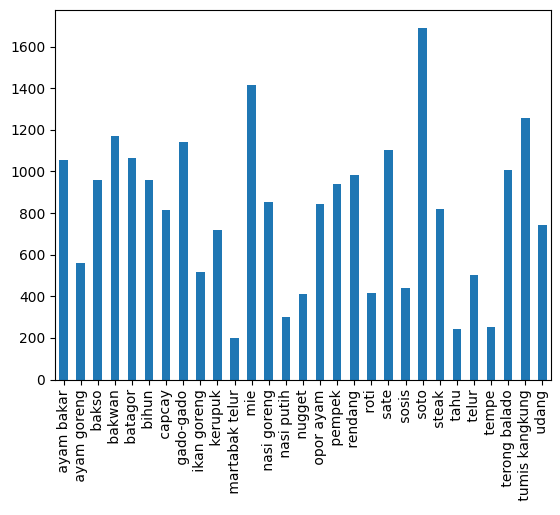

In [3]:

train_df = pd.read_csv(os.path.join(dataset.location, 'train', '_classes.csv'))
valid_df = pd.read_csv(os.path.join(dataset.location, 'valid', '_classes.csv'))
test_df = pd.read_csv(os.path.join(dataset.location, 'test', '_classes.csv'))

pred_class = list(train_df.drop(columns=['filename']).columns)

for i, trial in train_df.iterrows():
  train_df.loc[i, "filename"] = os.path.join(dataset.location, "train", train_df.loc[i, "filename"])

for i, trial in valid_df.iterrows():
  valid_df.loc[i, "filename"] = os.path.join(dataset.location, "valid", valid_df.loc[i, "filename"])

for i, trial in test_df.iterrows():
  test_df.loc[i, "filename"] = os.path.join(dataset.location, "test", test_df.loc[i, "filename"])

x_train = list(train_df['filename'])
x_valid = list(valid_df['filename'])

y_train = train_df.drop(columns=['filename']).to_numpy()
y_valid = valid_df.drop(columns=['filename']).to_numpy()
y_test = test_df.drop(columns=['filename']).to_numpy()

# dataset_df = pd.concat([train_df, valid_df, test_df])

# x_ds = list(dataset_df['filename'])
# y_ds = dataset_df.drop(columns=['filename']).to_numpy()
pd.DataFrame(y_train, columns=pred_class).sum().plot.bar()

In [4]:
for clas in pred_class:
  print(clas)

 ayam bakar
 ayam goreng
 bakso
 bakwan
 batagor
 bihun
 capcay
 gado-gado
 ikan goreng
 kerupuk
 martabak telur
 mie
 nasi goreng
 nasi putih
 nugget
 opor ayam
 pempek
 rendang
 roti
 sate
 sosis
 soto
 steak
 tahu
 telur
 tempe
 terong balado
 tumis kangkung
 udang


In [5]:
weight_label = pd.DataFrame(y_train).sum()
sum_label = weight_label.sum()
max_label = weight_label.max()
weight_label = 1 / (weight_label / max_label)
weight_label = weight_label.to_dict()
weight_label     

{0: 1.6022727272727273,
 1: 3.021428571428572,
 2: 1.768025078369906,
 3: 1.4461538461538461,
 4: 1.5872420262664166,
 5: 1.7625,
 6: 2.0709914320685434,
 7: 1.4803149606299213,
 8: 3.2664092664092665,
 9: 2.35,
 10: 8.545454545454545,
 11: 1.1932299012693934,
 12: 1.981264637002342,
 13: 5.64,
 14: 4.096852300242131,
 15: 2.0,
 16: 1.7961783439490446,
 17: 1.724770642201835,
 18: 4.086956521739131,
 19: 1.5339981867633725,
 20: 3.8630136986301373,
 21: 1.0,
 22: 2.0583941605839415,
 23: 6.906122448979592,
 24: 3.357142857142857,
 25: 6.714285714285714,
 26: 1.680238331678252,
 27: 1.3460620525059666,
 28: 2.2741935483870965}

In [6]:
train_df.info()
valid_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22387 entries, 0 to 22386
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   filename         22387 non-null  object
 1    ayam bakar      22387 non-null  int64 
 2    ayam goreng     22387 non-null  int64 
 3    bakso           22387 non-null  int64 
 4    bakwan          22387 non-null  int64 
 5    batagor         22387 non-null  int64 
 6    bihun           22387 non-null  int64 
 7    capcay          22387 non-null  int64 
 8    gado-gado       22387 non-null  int64 
 9    ikan goreng     22387 non-null  int64 
 10   kerupuk         22387 non-null  int64 
 11   martabak telur  22387 non-null  int64 
 12   mie             22387 non-null  int64 
 13   nasi goreng     22387 non-null  int64 
 14   nasi putih      22387 non-null  int64 
 15   nugget          22387 non-null  int64 
 16   opor ayam       22387 non-null  int64 
 17   pempek          22387 non-null

In [7]:
train_df.describe()

,ayam bakar,ayam goreng,bakso,bakwan,batagor,bihun,capcay,gado-gado,ikan goreng,kerupuk,...,sate,sosis,soto,steak,tahu,telur,tempe,terong balado,tumis kangkung,udang
count,22387.000000,22387.000000,22387.000000,22387.000000,22387.000000,22387.000000,22387.000000,22387.000000,22387.000000,22387.000000,...,22387.000000,22387.000000,22387.00000,22387.000000,22387.000000,22387.000000,22387.000000,22387.000000,22387.000000,22387.000000
mean,0.047170,0.025015,0.042748,0.052262,0.047617,0.042882,0.036494,0.051056,0.023138,0.032162,...,0.049270,0.019565,0.07558,0.036718,0.010944,0.022513,0.011257,0.044981,0.056149,0.033234
std,0.212008,0.156173,0.202293,0.222561,0.212959,0.202596,0.187521,0.220118,0.150346,0.176433,...,0.216435,0.138503,0.26433,0.188072,0.104041,0.148348,0.105500,0.207268,0.230214,0.179250
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
valid_df.describe()

,ayam bakar,ayam goreng,bakso,bakwan,batagor,bihun,capcay,gado-gado,ikan goreng,kerupuk,...,sate,sosis,soto,steak,tahu,telur,tempe,terong balado,tumis kangkung,udang
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,...,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,0.078778,0.165595,0.011254,0.020900,0.025723,0.016077,0.059486,0.016077,0.054662,0.017685,...,0.014469,0.006431,0.017685,0.038585,0.094855,0.131833,0.069132,0.032154,0.016077,0.112540
std,0.269609,0.372016,0.105571,0.143166,0.158437,0.125874,0.236722,0.125874,0.227503,0.131909,...,0.119512,0.079999,0.131909,0.192759,0.293251,0.338581,0.253882,0.176552,0.125874,0.316284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
test_df.describe()

,ayam bakar,ayam goreng,bakso,bakwan,batagor,bihun,capcay,gado-gado,ikan goreng,kerupuk,...,sate,sosis,soto,steak,tahu,telur,tempe,terong balado,tumis kangkung,udang
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,...,399.000000,399.0,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,0.050125,0.080201,0.017544,0.052632,0.045113,0.137845,0.017544,0.020050,0.027569,0.052632,...,0.065163,0.0,0.012531,0.047619,0.035088,0.087719,0.060150,0.025063,0.010025,0.005013
std,0.218477,0.271944,0.131451,0.223577,0.207812,0.345170,0.131451,0.140348,0.163940,0.223577,...,0.247123,0.0,0.111379,0.213226,0.184233,0.283241,0.238064,0.156512,0.099747,0.070710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
